# <center>*fastText Data Analysis on LibraryThing Dataset (Social Recommendation Data)*</center>

**Mounting the google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
# Importing all the necessary libraries

import json
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
rcParams['figure.figsize'] = 15,5
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Changing the current directory to the project files folder

!cd '/content/drive/My Drive/ADS/'

In [4]:
# The original dataset has 1.3 million rows, so here we are getting the top 0.5 million records using head and creating a copy of the original reviews file.

!head -500000 '/content/drive/My Drive/ADS/reviews.json' > '/content/drive/My Drive/ADS/reviews_5L.json'

In [5]:
# Helper function that is performing various splitting operations in order to read the .json file without any issue.

def getJson(filepath):            # Defining a function with a file path parameter
    fr = open(filepath, 'r')
    lines = []                    # Creating an empty list
    for line in fr.readlines():   # Reading lines one by one from the file
        line_split = line.split(",")      # Splitting the lines where , is encountered
        set_line_split = []               # Defining the splitted line as an empty list
        for i in line_split:              # Iterating over splitted lines
            i_split = i.split(":")        # Again, splitting where : is encountered in the text
            i_set_split = []
            for split_i in i_split:
                set_split_i = ""
                rev = ""
                i = 0
                for ch in split_i:
                    if ch in ['\"','\'']:
                        set_split_i += ch
                        i += 1
                        break
                    else:
                        set_split_i += ch
                        i += 1
                i_rev = (split_i[i:])[::-1]
                state = False
                for ch in i_rev:
                    if ch in ['\"','\''] and state == False:
                        rev += ch
                        state = True
                    elif ch in ['\"','\''] and state == True:
                        rev += ch
                    else:
                        rev += ch
                i_rev = rev[::-1]
                set_split_i += i_rev
                i_set_split.append(set_split_i)
            set_line_split.append(":".join(i_set_split))
        line_modified = ",".join(set_line_split)
        lines.append(ast.literal_eval(str(line_modified)))      
    return lines
lines = getJson('/content/drive/My Drive/ADS/reviews_5L.json')

In [6]:
  # Creating a pandas DataFrame of the json file output received from the above helper function and printing the top 10 records to look at the loaded data.

df_reviews = pd.DataFrame(lines)
print(df_reviews.shape)
df_reviews.head(10)

(500000, 8)


,work,flags,unixtime,stars,nhelpful,time,comment,user
0,3206242,[],1.194394e+09,5.0,0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef
1,12198649,[],1.333757e+09,5.0,0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2
2,12533765,[],1.352938e+09,NaN,0,"Nov 15, 2012","Magoon, K. (2012). Fire in the streets. New Yo...",edspicer
3,12981302,[],1.364515e+09,4.0,0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2
4,5231009,[],1.270944e+09,3.0,0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus
5,184318,[],1.231373e+09,2.0,0,"Jan 8, 2009",I really didn't find that this book allowed me...,skinglist
6,364456,[],1.229645e+09,4.0,0,"Dec 19, 2008",During the early part of the twentieth century...,saibaby79
7,3067,[],1.160266e+09,4.5,0,"Oct 8, 2006",great storytelling in this novel about a coupl...,justine
8,4857142,[],1.303430e+09,4.0,0,"Apr 22, 2011",At 70 pages more of a novella than a short sto...,aulsmith
9,45518,[],1.171238e+09,2.5,0,"Feb 12, 2007","To tell you the truth, I liked the movie a lot...",ChelseaBottomley


In [7]:
# Drop NAN's from all the columns of interest using subset.

Updated_df = df_reviews.dropna(subset=['comment','stars','time','user','nhelpful'])
print(Updated_df.shape)
Updated_df.head(10)

(406441, 8)


,work,flags,unixtime,stars,nhelpful,time,comment,user
0,3206242,[],1.194394e+09,5.0,0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef
1,12198649,[],1.333757e+09,5.0,0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2
3,12981302,[],1.364515e+09,4.0,0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2
4,5231009,[],1.270944e+09,3.0,0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus
5,184318,[],1.231373e+09,2.0,0,"Jan 8, 2009",I really didn't find that this book allowed me...,skinglist
6,364456,[],1.229645e+09,4.0,0,"Dec 19, 2008",During the early part of the twentieth century...,saibaby79
7,3067,[],1.160266e+09,4.5,0,"Oct 8, 2006",great storytelling in this novel about a coupl...,justine
8,4857142,[],1.303430e+09,4.0,0,"Apr 22, 2011",At 70 pages more of a novella than a short sto...,aulsmith
9,45518,[],1.171238e+09,2.5,0,"Feb 12, 2007","To tell you the truth, I liked the movie a lot...",ChelseaBottomley
10,20028,[],1.262736e+09,3.5,0,"Jan 6, 2010","Ecellent writing, very poignant. Will definite...",wondersdisciple


In [8]:
# Selecting only required columns from the dataframe for further analysis.

Updated_df = Updated_df[['stars','time','comment','user','nhelpful']]
Updated_df.head(10)

,stars,time,comment,user,nhelpful
0,5.0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef,0
1,5.0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2,0
3,4.0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2,0
4,3.0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus,0
5,2.0,"Jan 8, 2009",I really didn't find that this book allowed me...,skinglist,0
6,4.0,"Dec 19, 2008",During the early part of the twentieth century...,saibaby79,0
7,4.5,"Oct 8, 2006",great storytelling in this novel about a coupl...,justine,0
8,4.0,"Apr 22, 2011",At 70 pages more of a novella than a short sto...,aulsmith,0
9,2.5,"Feb 12, 2007","To tell you the truth, I liked the movie a lot...",ChelseaBottomley,0
10,3.5,"Jan 6, 2010","Ecellent writing, very poignant. Will definite...",wondersdisciple,0


In [9]:
# We are calculating the word count and the char_count, in the comment column for the reviews.

Updated_df['comment_wordcount'] = Updated_df['comment'].apply(lambda x : len(x.split()))
Updated_df['comment_charcount'] = Updated_df['comment'].apply(lambda x : len(x.replace(" ","")))
Updated_df.head(10)

,stars,time,comment,user,nhelpful,comment_wordcount,comment_charcount
0,5.0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef,0,16,67
1,5.0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2,0,484,2102
3,4.0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2,0,87,377
4,3.0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus,0,103,476
5,2.0,"Jan 8, 2009",I really didn't find that this book allowed me...,skinglist,0,36,172
6,4.0,"Dec 19, 2008",During the early part of the twentieth century...,saibaby79,0,868,4655
7,4.5,"Oct 8, 2006",great storytelling in this novel about a coupl...,justine,0,14,72
8,4.0,"Apr 22, 2011",At 70 pages more of a novella than a short sto...,aulsmith,0,103,502
9,2.5,"Feb 12, 2007","To tell you the truth, I liked the movie a lot...",ChelseaBottomley,0,129,568
10,3.5,"Jan 6, 2010","Ecellent writing, very poignant. Will definite...",wondersdisciple,0,11,66


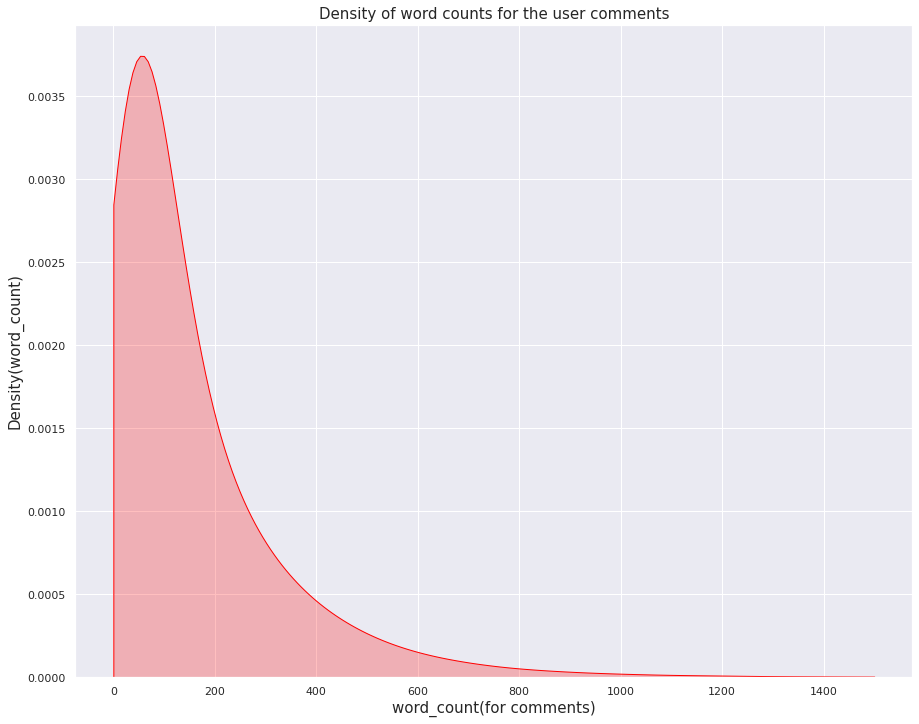

In [10]:
# Plotting a density plot to look at the distribution of the stars/ratings given to various user book's based on word

sns.set(color_codes=True)
plt.figure(figsize=(15,12))
plt.title("Density of word counts for the user comments", fontsize = 15)
plt.xlabel('word_count(for comments)', fontsize=15)
plt.ylabel('Density(word_count)', fontsize=15)
sns.kdeplot(Updated_df['comment_wordcount'], x = Updated_df['comment_wordcount'], shade=True, bw_method = 0.3, clip=(0,1500), color='red')
plt.show()

**Interpretation:** From the plot , we can interpret that, at majority, the word count for the comment/reviews from users for the author books are in the range of 0-400 words which means that majority of end users have provided comprehensive feebacks/comments to the author books.

In [11]:
# Getting stopwords in the english language dictionary and printing that stopwords dict.

stop_words = set(stopwords.words("english"))
print(stop_words)

{'up', 'does', 'shan', 'themselves', 'her', "won't", 'when', 'once', 'but', 'had', 'until', 'only', 'ain', "that'll", "it's", 'hasn', "isn't", 'ma', 'in', 'needn', 'were', 'and', 'these', 'some', "doesn't", "you'd", 'himself', "didn't", 'over', 'yours', 'such', 'out', 'than', 'i', "mightn't", 'can', 'few', 'my', 'your', 'haven', "should've", 'will', 'has', 'what', 'll', 'against', 'no', 'been', 'y', 'don', 'he', 'any', 'weren', 'each', 'is', 'other', "wouldn't", 'isn', 'as', 'if', "shouldn't", 'them', 'to', 'that', 'our', 'yourself', 'with', 'again', 'shouldn', 'very', 'doesn', 'we', 'same', 'into', 'now', "you're", "aren't", "you'll", 'by', 'mightn', 'on', "mustn't", 'd', "needn't", 'too', 'about', 'there', 'have', 'this', 'be', 'below', 'down', 'an', 'most', 'here', 'off', 'myself', 'during', 'from', "you've", 'the', 't', 'above', 'hadn', 'through', "shan't", 'a', 'o', 'its', 'under', 'm', 'was', 'ours', 'they', 'did', 'of', 'wouldn', 'wasn', 'because', 'are', 'for', 'nor', 'before',

In [12]:
# joining the first 30K rows of user column data from the dataframe and converting it to lowercase.

user_count = ' '.join(Updated_df['user'][0:30000].str.lower())
user_count

'van_stef dwatson2 amdrane2 lila_gustavus skinglist saibaby79 justine aulsmith chelseabottomley wondersdisciple curvymommy schatzi aztwinmom tryst zumbanista jwhenderson aridy epoliti stephmo eyejaybee billietexas schatzi geniusjen sabrina89 lisamaria_c potterwholockian guavalove roguera kassilem gildallie mrstelford judithrs sally906 lindelv lisamaria_c lisabankey laytonwoman3rd roworthing alessvi timsshelves bongo_x vercoutere buffalogr sararush lsmoore43 pastorstevensimpson stpnwlf dwwilkin editfish tjsjohanna brenzi elizabeth1977 richard_carpenter librarybrandy shhs72 tinylittlelibrarian stacyisliterate lottaberling jlapac ericfitz08 aricana prop2gether snapperxv phoebereading milboy gaialover vis02124 endlich-leben.net skylerashcraft nanakitteh jurateje tututhefirst sarlenes kevinjoseph eheinlen caflores plappen trandism kassilem miketroll scrabblenut thebooklarva tadad ricksbooks mdshrk1 shanaqui jlsmither davidlouisedelman ninefivepeak mybookishways kthclark kitchengardenbooks k

In [13]:
# Calling the wordcloud function and passing the required parameters.

wordcloud = WordCloud(background_color="skyblue", stopwords = ['one','and','the','of','is','to','be','it']).generate(user_count)

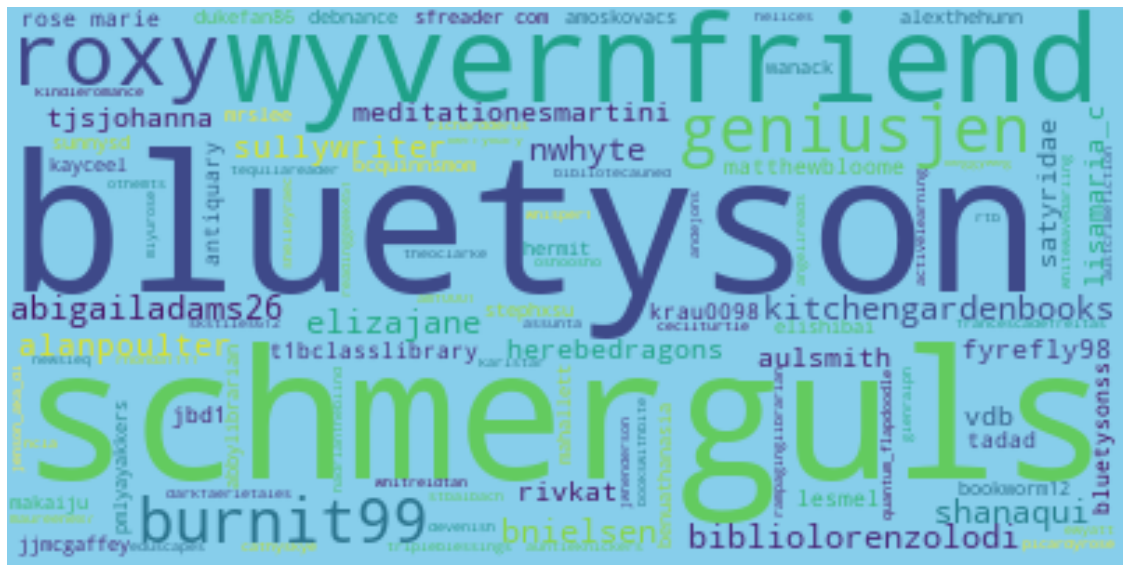

In [14]:
# Constructing wordcloud for the number of users in the top 30k records from the dataset.

rcParams['figure.figsize'] = 20, 20
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Interpretation:** We can say by looking at the wordcloud that the most number of reviews/comment from people are for mainly two users which are `schmerguls` and `bluetyson` followed by `burnit99` and rest others.

In [15]:
# Here, we are fetching the count of rating/stars given to the book authors by people sorted in ascending order

rating_count = Updated_df["stars"].value_counts(ascending=True)
rating_count

0.5      2123
1.5      2882
1.0      8476
2.5     11047
2.0     23030
4.5     24909
3.5     34073
3.0     71696
5.0     99259
4.0    128946
Name: stars, dtype: int64

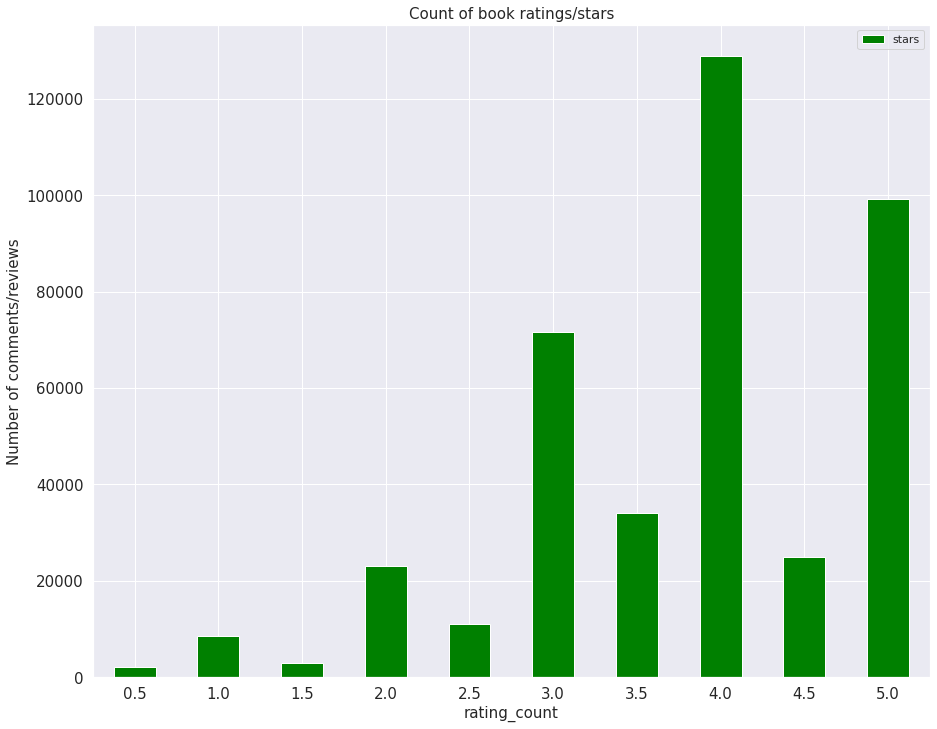

In [16]:
# Now, we are plotting the actual count of each rating/stars.

fig, ax = plt.subplots(figsize=(15, 12))

rating_plot =rating_count.sort_index(ascending=True).plot.bar(x='rating_count',
                      ax=ax,fontsize=15,color = 'green')

ax.set_title("Count of book ratings/stars",size=15)
ax.legend()
plt.xlabel("rating_count",size=15)
plt.ylabel("Number of comments/reviews",size=15)

plt.xticks(rotation=360)
plt.show()

**Interpretation:** We can interpret from the above bar plot that the maximum number of comments by people have been on the books which are rated 4.0, followed by books which are rated 5.0 and so on.